In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv(r'C:\Users\91861\Desktop\Artifical Intelligence\Machine Leraning\14. HIERACHICAL CLUSTERING\hierarchical_clustering_dataset.csv')

In [4]:
df.shape

(200, 5)

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df= df.iloc[:, 3:5].values

In [7]:
from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(df)

In [8]:
df

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

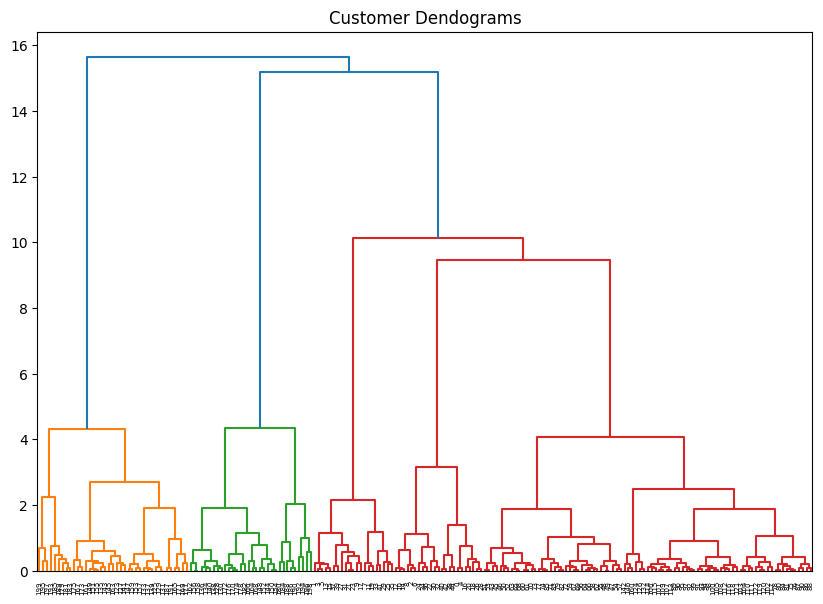

In [9]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendograms")
dend=shc.dendrogram(shc.linkage(df,method='ward'))

In [10]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5,linkage='ward')
labels = cluster.fit_predict(df)

In [11]:
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

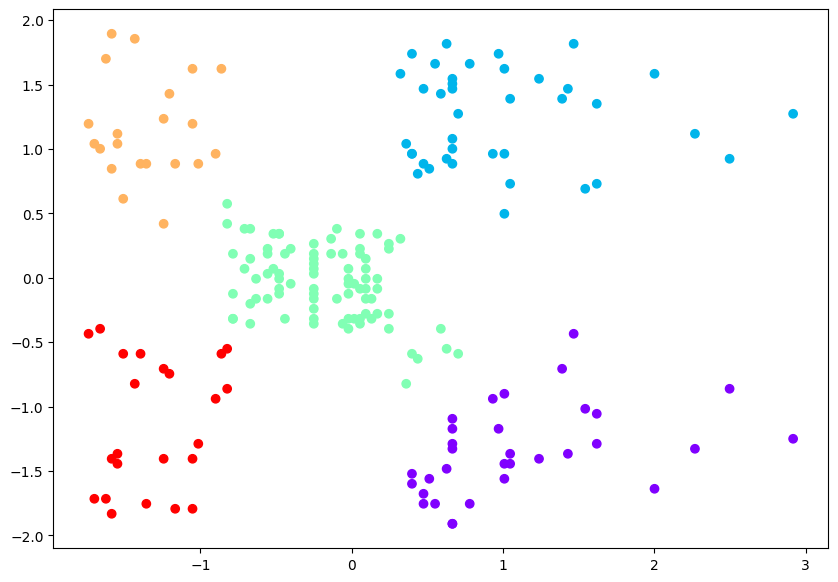

In [12]:
plt.figure(figsize=(10, 7))
plt.scatter(df[:,0], df[:,1], c=cluster.labels_, cmap='rainbow')

In [13]:
# -----------------------------------------------------------------------------------------------------------------------

In [14]:
# -----------------------------------------------------------------------------------------------------------------------

In [15]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df, labels)
score

0.5538089226688662

In [16]:
import numpy as np
from scipy.spatial.distance import pdist, cdist

def dunn_index(X, labels):
    clusters = np.unique(labels)
    
    intra_dists = []
    for c in clusters:
        points = X[labels == c]
        if len(points) > 1:
            intra_dists.append(np.max(pdist(points)))
        else:
            intra_dists.append(0)
    
    max_intra = np.max(intra_dists)
    
    inter_dists = []
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            pi = X[labels == clusters[i]]
            pj = X[labels == clusters[j]]
            inter_dists.append(np.min(cdist(pi, pj)))
    
    min_inter = np.min(inter_dists)
    
    return min_inter / max_intra


In [17]:
dunn_score = dunn_index(df, labels)
dunn_score    

0.09029561169415508

In [27]:
# Via library 
from validclust import dunn
from scipy.spatial.distance import pdist, squareform

dist_matrix = squareform(pdist(df))

score = dunn(dist_matrix,labels)
print(score)


0.09029561169415508
